Reference:
* Sebastian Raschka, Yuxi Hayden Liu, and Vahid Mirjalili. Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing Ltd, 2022.

## Adaline (Adaptive Linear Neuron)

In [25]:
from IPython.display import Image
from IPython.display import display

display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/adaline_flowchart.png", width=700))



In [35]:
import numpy as np


class Adaline:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss values at each epoch

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)

        self.losses_ = []

        for i in range(self.n_iter):
          net_input = self.net_input(X)
          output = self.activation(net_input)
          errors = (y-output)
          # the following is vectorized
          self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0] #[n_features,n_examples]*[n_examples] = [n_features]
          self.b_ += self.eta * 2.0 * errors.mean()
          loss = (errors**2).mean()
          self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

### Using the Iris data

In [36]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Plotting the Iris data

(50, 2)
(50, 2)


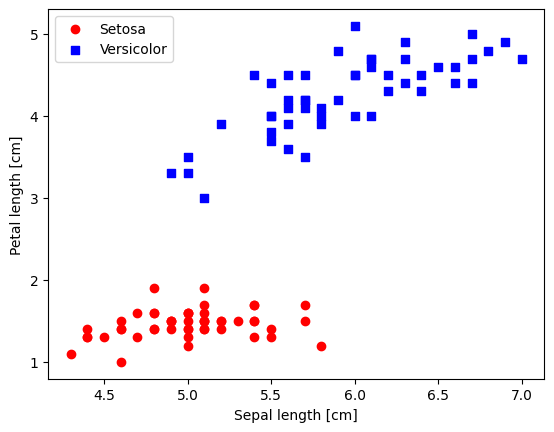

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



# select setosa and versicolor
#y = df.iloc[0:100, 4].values

y = df.iloc[:, 4].values
X = df.iloc[:, [0, 2]].values  # extract sepal length and petal length

# Map y values to 0, 1, or -1
y_mapped = np.select(
    [y == 'Iris-setosa', y == 'Iris-versicolor'],  # Conditions
    [0, 1],                                        # Values to assign if the condition is True
    default=-1                                     # Value to assign if none of the conditions are True
)


mask = (y_mapped == 0) | (y_mapped == 1)  # Mask for selecting only 0 and 1 in y_mapped


X_filtered = X[mask]
y_filtered = y_mapped[mask]


# Filter the first 50 occurrences of category 0
mask_0 = (y_filtered == 0)
X_0 = X_filtered[mask_0][:50]

# Filter the first 50 occurrences of category 1
mask_1 = (y_filtered == 1)
X_1 = X_filtered[mask_1][:50]


print(np.shape(X_0))
print(np.shape(X_1))


# plot data
plt.scatter(X_0[:, 0], X_0[:, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X_1[:, 0], X_1[:, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

<br>
<br>

### Training the Adaline model

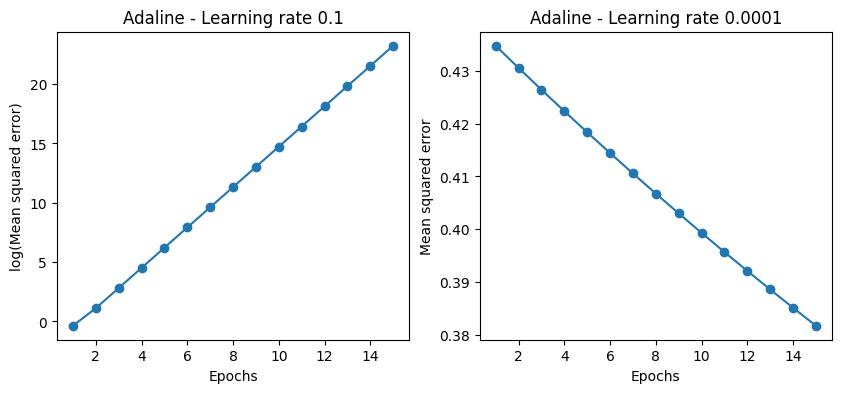

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = Adaline(n_iter=15, eta=0.1).fit(X_filtered, y_filtered)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = Adaline(n_iter=15, eta=0.0001).fit(X_filtered, y_filtered)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

Plot on the left shows that the learning rate is too high, the one on the right that the learning rate is too low.

### Standardize Data

This can be very helpful: gradient descent is one of many algorithms that benefit from feature scaling.

In [39]:
X_std = np.copy(X_filtered)
X_std[:,0] = (X_filtered[:,0]-X_filtered[:,0].mean())/X_filtered[:,0].std()
X_std[:,1] = (X_filtered[:,1]-X_filtered[:,1].mean())/X_filtered[:,1].std()

In [40]:
ada_gd = Adaline(n_iter=20, eta=0.5).fit(X_std, y_filtered)

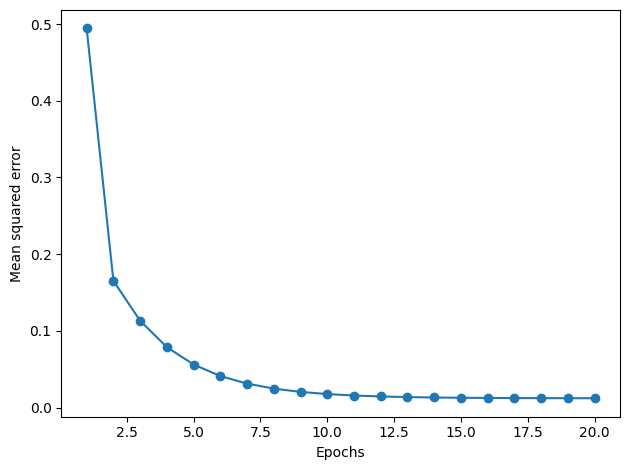

In [41]:
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

plt.tight_layout()
plt.show()

### Plotting decision regions

In [42]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

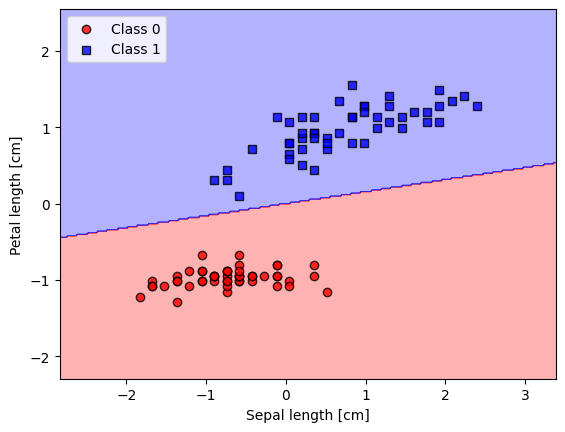

In [43]:
plot_decision_regions(X_std, y_filtered, classifier=ada_gd)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


plt.show()

### Accuracy

In [44]:
y_pred = ada_gd.predict(X_std)

accuracy = np.sum(y_pred == y_filtered) / len(y_filtered)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%
